In [682]:
import numpy as np
import math
from numpy.random import randint

from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, IBMQ, Aer

from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.extensions import Initialize

from qiskit.quantum_info import partial_trace



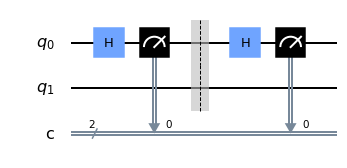

In [683]:
q = QuantumCircuit(2,2)

def Ua(qc,qubit,cbit1,cbit2):
    if cbit2 == 0:
        if cbit1 == 1:
            qc.x(qubit)
    else:
        if cbit1 == 0:
            qc.h(qubit)
        else:
            qc.x(qubit)
            qc.h(qubit)
            qc.barrier()
            
Ua(q,0,1,1)
display(qc.draw(output='mpl'))


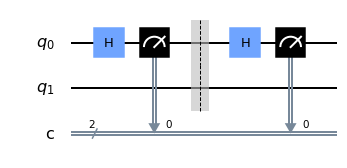

In [684]:
def Ub(qc,qubit,cbit):
    if cbit == 1:
        qc.h(qubit)
        qc.measure(0,0)
        qc.barrier()
    else:
        qc.measure(0,0)
        qc.barrier()
        
Ub(q,0,1)
display(qc.draw(output='mpl'))        

In [685]:
############ parte 1 protocolo
############ parte 1 protocolo
############ parte 1 protocolo


In [687]:
def codificar(qubit, bits, bases):
    mensagem = []
    for i in range(len(bits)):
        qc = QuantumCircuit(2,2)
        Ua(qc,qubit,bits[i],bases[i])

        mensagem.append(qc)
    return mensagem

def medir_mensagem(qubit, mensagem, bases):
    backend = Aer.get_backend('qasm_simulator')
    medicoes = []
    for i in range(len(bases)):
        Ub(mensagem[i],qubit,bases[i])
        result = execute(mensagem[i], backend, shots=1000, memory=True).result()
        bit_medido = int(result.get_memory()[0])
        medicoes.append(bit_medido)
    return medicoes

def remover_errados(a_bases, b_bases, bits):
    bits_certos = []
    for i in range(len(bits)):
        if a_bases[i] == b_bases[i]:
            bits_certos.append(bits[i])
    return bits_certos

def escolha_bits(bits, selecionado):
    escolha = []
    for i in selecionado:

        i = np.mod(i, len(bits))
        escolha.append(bits.pop(i))
    return escolha

def erro(b1, b2, size):
    e1 = []
    e2 = []
    n = 0
    for i in range(len(b1)):
        if b1[i] != b2[i]:
            n = +1
    for i in size:
        i = np.mod(i, len(b1))
        e1.append(b1.pop(i))
    for i in size:
        i = np.mod(i, len(b2))
        e2.append(b2.pop(i))
    error = 100-100*((len(b1) - n)/(len(b1)))
    print('Erro = ' + str(error))
    return e1, e2

In [692]:
#####fim funcoes

In [693]:
np.random.seed(seed = 2)
n = 100


b1 = randint(2, size=n)  # bits alice
alicebases = randint(2, size=n)
mensagem = codificar(0, b1, alicebases)  #codifica

bobbases = randint(2, size=n)  #base escolhida por bob
bobresults = medir_mensagem(0, mensagem, bobbases) #medicao pelo bob

alicekey = remover_errados(alicebases, bobbases, b1)
bobkey = remover_errados(alicebases, bobbases, bobresults)

p = 20  #amostra

selecaobit = randint(n, size = p)

mostraalice, mostrabob = erro(alicekey, bobkey, selecaobit)
print(" alice = " + str(mostraalice))
print(" bob = " + str(mostrabob))

Erro = 0.0
 alice = [0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0]
 bob = [0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0]


In [694]:
######################## parte 2 - interceptação
######################## parte 2 - interceptação
######################## parte 2 - interceptação
######################## parte 2 - interceptação
######################## parte 2 - interceptação

In [695]:
np.random.seed(seed = 3)
b1 = randint(2, size=n)  # bits alice
alicebases = randint(2, size=n)
mensagem = codificar(0, b1, alicebases)

evabases = randint(2, size=n)
evamensagem = medir_mensagem(0,mensagem,evabases)

bobbases = randint(2, size=n)
bobresults = medir_mensagem(1, mensagem, bobbases)

alicekey = remover_errados(alicebases, bobbases, b1)
bobkey = remover_errados(alicebases, bobbases, bobresults)


p = 10  #amostra

selecaobit = randint(n, size = p)

mostraalice, mostrabob = erro(alicekey, bobkey, selecaobit)
print(" alice = " + str(mostraalice))
print(" bob = " + str(mostrabob))

Erro = 2.3809523809523796
 alice = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0]
 bob = [1, 1, 1, 0, 1, 0, 0, 1, 0, 0]


In [698]:
def xor(b1,b2):
    b = b1 + b2
    return b%2
    
def fxor(key):
    new_key = []
    i = 0
    while i < (len(key)-1):
        result = xor(key[i],key[i+1])
        new_key.append(result)
        i= i + 2
    return new_key

In [699]:
np.random.seed(seed = 3)
b1 = randint(2, size=n)  # bits alice
alicebases = randint(2, size=n)
mensagem = codificar(0, b1, alicebases)

evabases = randint(2, size=n)
evamensagem = medir_mensagem(0,mensagem,evabases)

bobbases = randint(2, size=n)
bobresults = medir_mensagem(1, mensagem, bobbases)

alicekey = remover_errados(alicebases, bobbases, b1)
bobkey = remover_errados(alicebases, bobbases, bobresults)


p = 10  #amostra

selecaobit = randint(n, size = p)

mostraalice, mostrabob = erro(alicekey, bobkey, selecaobit)
print(" alice = " + str(mostraalice))
print(" bob = " + str(mostrabob))

Erro = 2.3809523809523796
 alice = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0]
 bob = [1, 1, 1, 0, 1, 1, 0, 0, 1, 0]


In [700]:
alicekey = fxor(mostraalice)
bobkey = fxor(mostrabob)

p = 10  #amostra

selecaobit = randint(n, size = p)

mostraalice, mostrabob = erro(alicekey, bobkey, selecaobit)
print(" alice = " + str(mostraalice))
print(" bob = " + str(mostrabob))

<ipython-input-691-44f94a42741e>:9: RuntimeWarning: divide by zero encountered in remainder
  i = np.mod(i, len(b1))


IndexError: pop from empty list